In [10]:
import pandas as pd 
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df = pd.read_csv(r'../../resources/dataset_sentimientos_robusto.csv')
df.head()

,id,texto,sentimiento,categoria,fecha,dia_semana,hora_aproximada,es_fin_de_semana,calificacion,canal,...,num_palabras,tiene_mayusculas_excesivas,num_signos_exclamacion,tiempo_respuesta_horas,fue_respondido,resolucion,prioridad,requiere_atencion_inmediata,confianza_modelo,requiere_revision_humana
0,1,Es aceptable,Neutro,Soporte Técnico,2024-12-09,Monday,Noche,False,3,Teléfono,...,2,False,0,36.0,True,NaN,Media,False,0.76,True
1,2,Es adecuado. Servicio regular,Neutro,Delivery,2025-08-03,Sunday,Tarde,True,3,Email,...,4,False,0,55.0,True,Resuelto,Baja,False,0.64,True
2,3,El servicio fue malísimo!,Negativo,Delivery,2024-02-04,Sunday,Noche,True,1,App Móvil,...,4,False,1,NaN,False,NaN,Media,False,0.81,False
3,4,Entrega rápida y producto impecable. Servicio ...,Positivo,Aplicación Móvil,2025-11-15,Saturday,Mañana,True,5,Email,...,9,False,1,NaN,False,NaN,Baja,False,0.85,False
4,5,No lo recomiendo para nada,Negativo,Hotel,2024-09-26,Thursday,Noche,False,1,Chat,...,5,False,0,NaN,False,NaN,Media,False,0.94,False


In [4]:
df = df[['texto', 'sentimiento']]
df.head()

,texto,sentimiento
0,Es aceptable,Neutro
1,Es adecuado. Servicio regular,Neutro
2,El servicio fue malísimo!,Negativo
3,Entrega rápida y producto impecable. Servicio ...,Positivo
4,No lo recomiendo para nada,Negativo


In [5]:
distribucion_sentimentos = round(df['sentimiento'].value_counts(normalize = True)*100,2)
print(distribucion_sentimentos)

sentimiento
Positivo    45.0
Negativo    30.0
Neutro      25.0
Name: proportion, dtype: float64


In [6]:
corpus_entrenamiento, corpus_prueba, y_entrenamiento, y_prueba = train_test_split(
    df['texto'],
    df['sentimiento'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df['sentimiento'])

In [7]:
def print_distribution(name, series):
    series = pd.Series(series)
    dist = series.value_counts(normalize=True)
    print(f"{name} Distribution:\n{dist}\n")

# Maintains the original Odyssey/Iliad ratio
print_distribution("Distribución Entrenamiento", y_entrenamiento)
print_distribution("Distribución Prueba", y_prueba)

Distribución Entrenamiento Distribution:
sentimiento
Positivo    0.45
Negativo    0.30
Neutro      0.25
Name: proportion, dtype: float64

Distribución Prueba Distribution:
sentimiento
Positivo    0.45
Negativo    0.30
Neutro      0.25
Name: proportion, dtype: float64



In [12]:
# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Eliminar stopwords y lematizar
lemmatizer = WordNetLemmatizer()
stopword_list = set(stopwords.words('spanish'))

def procesar_texto_español(texto):
    # Eliminar HTML
    texto = BeautifulSoup(texto, "html.parser").get_text()
    # Eliminar URLs
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
    # Eliminar caracteres especiales y dígitos
    texto = re.sub(r'[^A-Za-zÁÉÍÓÚáéíóúÑñÜü\s]', '', texto)
    # Eliminar accentos
    texto = re.sub(r'[áÁ]', 'a', texto)
    texto = re.sub(r'[éÉ]', 'e', texto)
    texto = re.sub(r'[íÍ]', 'i', texto)
    texto = re.sub(r'[óÓ]', 'o', texto)
    texto = re.sub(r'[úÚ]', 'u', texto)
    texto = re.sub(r'[ñÑ]', 'n', texto)
    texto = re.sub(r'[üÜ]', 'u', texto)
    # Convertir a minúsculas
    texto = texto.lower()
    # Tokenizar
    tokens = word_tokenize(texto, language='spanish')
    # Eliminar stopwords y lematizar
    tokens_limpios = [lemmatizer.lemmatize(token) for token in tokens if token not in stopword_list]
    return ' '.join(tokens_limpios) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erik-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erik-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erik-\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
corpus_entrenamiento_normalizado = [procesar_texto_español(text) for text in corpus_entrenamiento]
corpus_prueba_normalizado = [procesar_texto_español(text) for text in corpus_prueba]

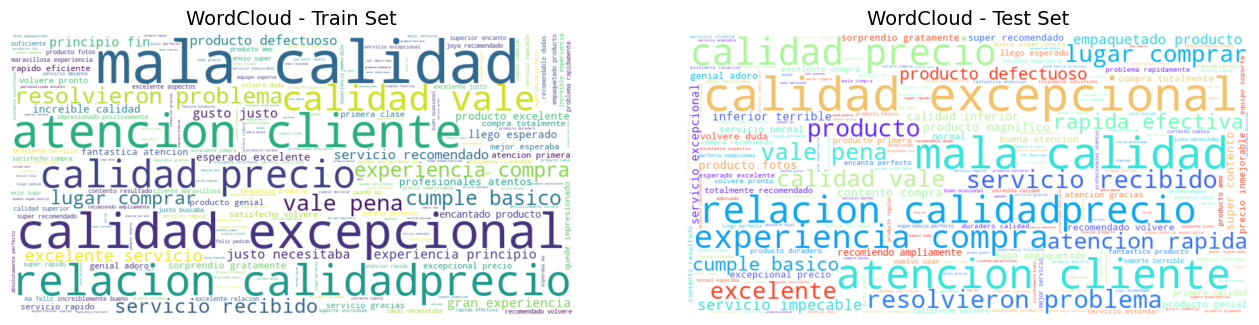

In [14]:
texto_entrenamiento = " ".join(corpus_entrenamiento_normalizado)
texto_prueba = " ".join(corpus_prueba_normalizado)

wc_train = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(texto_entrenamiento)
wc_test = WordCloud(width=800, height=400, background_color="white", colormap="rainbow").generate(texto_prueba)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.imshow(wc_train, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Train Set", fontsize=14)

plt.subplot(1,2,2)
plt.imshow(wc_test, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Test Set", fontsize=14)

plt.show()